In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *

In [2]:
df = pd.read_csv("ETH_1H.csv")
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [3]:
len(df)

34497

In [4]:
df.nunique()

Unix Timestamp    34497
Date              34497
Symbol                1
Open              20189
High              19276
Low               19259
Close             20189
Volume            31404
dtype: int64

In [5]:
df_1 = df.drop(columns=["Symbol","Unix Timestamp"])
df_1.head()

,Date,Open,High,Low,Close,Volume
0,2020-04-16 00:00:00,152.94,152.94,150.39,150.39,650.188125
1,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299
2,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279
3,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131
4,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622


In [18]:
df_2 = df_1.copy()
df_2["Date"] = pd.to_datetime(df_2["Date"])
df_2["Date"] = df_2["Date"].dt.date

grp_mean = df_2.groupby(by="Date").mean().round(2)
grp_min = df_2.groupby(by="Date").min().round(2)
grp_max = df_2.groupby(by="Date").max().round(2)

df_3 = pd.DataFrame(columns=df_2.columns[1:],index=grp_mean.index)
df_3[["Open","Close","Volume"]] = grp_mean[["Open","Close","Volume"]].copy()
df_3["Low"] = grp_min["Low"].copy()
df_3["High"] = grp_max["High"].copy()

df_3.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09,8.86,12.00,0.00,9.71,122.08
2016-05-10,9.58,9.96,9.36,9.59,26.96
2016-05-11,9.90,10.47,9.68,9.93,127.19
2016-05-12,10.51,12.00,9.92,10.50,86.36
2016-05-13,10.70,11.59,10.20,10.73,76.56


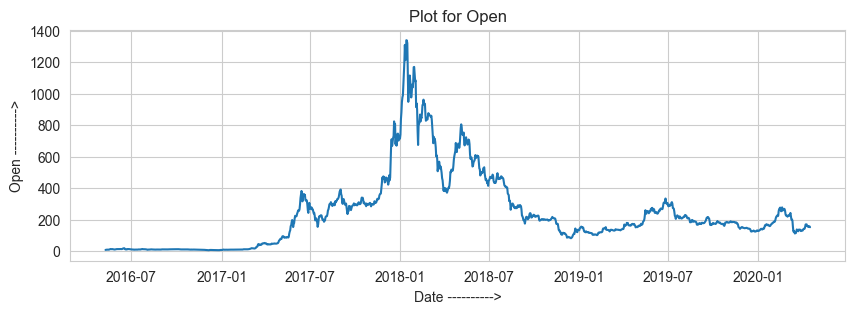

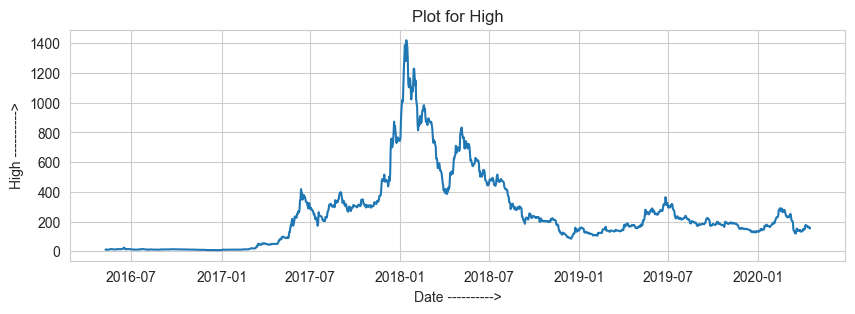

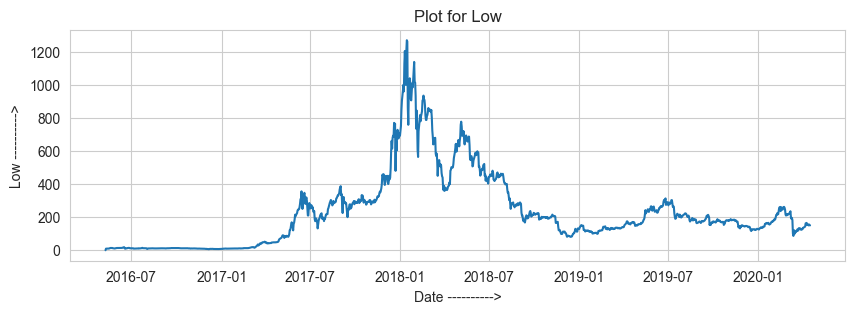

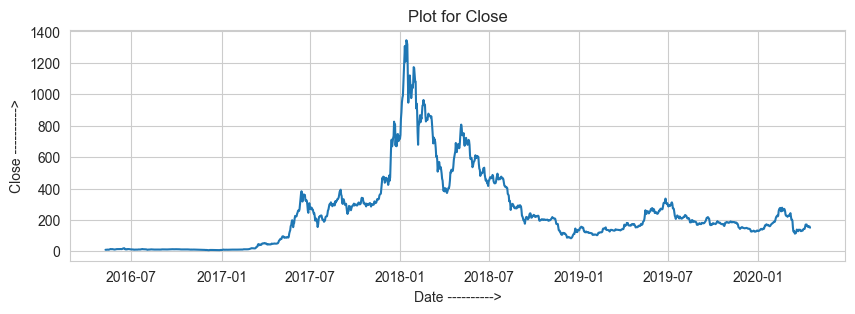

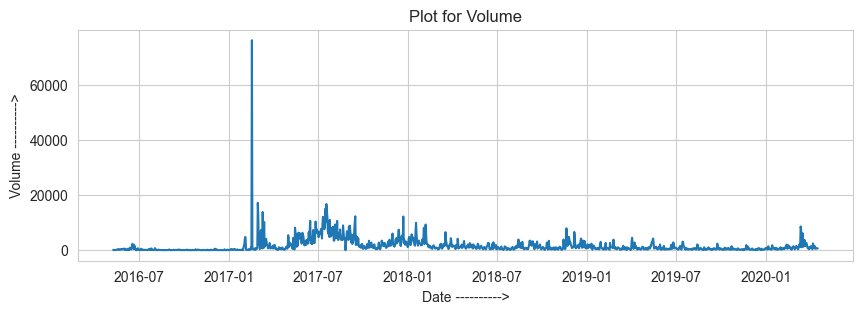

In [22]:
for i in df_3:
    plt.subplots(figsize=(10,3))
    sns.lineplot(df_3[i])
    plt.xlabel("Date ---------->")
    plt.ylabel(i+" ---------->")
    plt.title("Plot for "+i)
    plt.show()

In [46]:
df_4 = df_1.copy()
df_4["Date"] = pd.to_datetime(df_4["Date"])
df_4["hour"] = df_4["Date"].dt.hour
df_4["day"] = df_4["Date"].dt.day
df_4["month"] = df_4["Date"].dt.month
df_4["year"] = df_4["Date"].dt.year
df_4["dayofweek"] = df_4["Date"].dt.dayofweek
df_4["dayofyear"] = df_4["Date"].dt.dayofyear
df_4["weekofyear"] = df_4["Date"].dt.isocalendar().week

<Axes: >

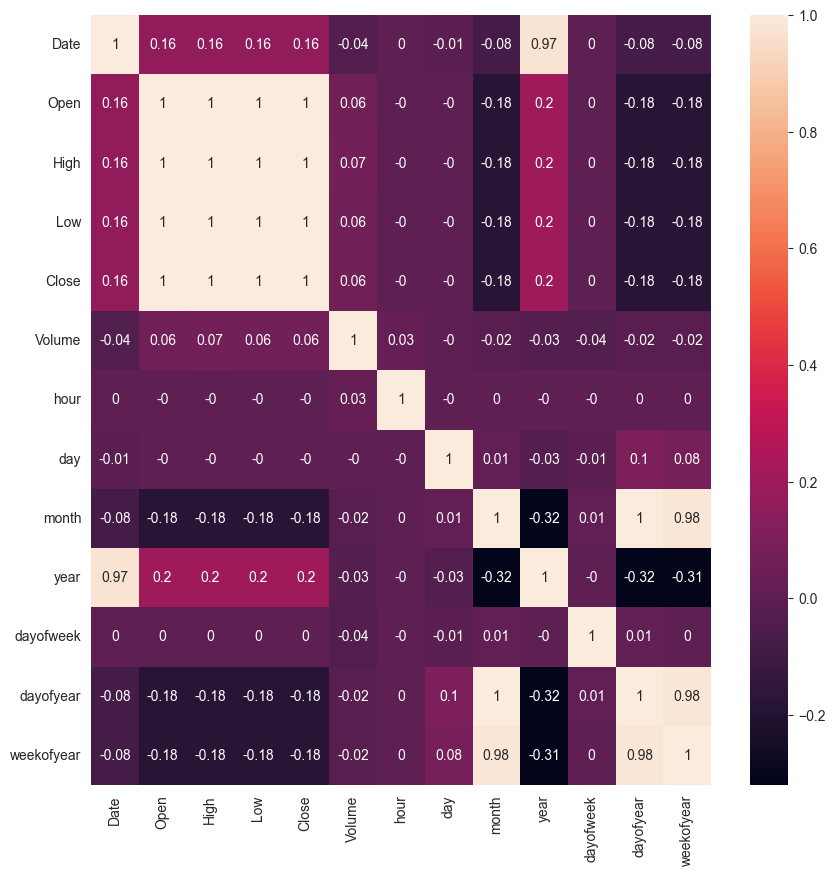

In [50]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_4.corr().round(2), annot=True)

In [70]:
df_5 = df_4.sort_values(by="Date", ascending=True).reset_index(drop=True)
df_5

,Date,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
0,2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
1,2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2,2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
3,2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
4,2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34492,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622,20,15,4,2020,2,106,16
34493,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131,21,15,4,2020,2,106,16
34494,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279,22,15,4,2020,2,106,16
34495,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299,23,15,4,2020,2,106,16


In [71]:
close = df_5["Close"]
windows = []
target = []

length = 240

for i in range(len(close) - length):
    x = close[i:i+length]
    y = close[i+length]
    print(i,i+length-1)
    print(i+length)
    print()
    windows.append(x)
    target.append(y)
windows = np.array(windows)
target = np.array(target).reshape(-1,1)

0 239
240

1 240
241

2 241
242

3 242
243

4 243
244

5 244
245

6 245
246

7 246
247

8 247
248

9 248
249

10 249
250

11 250
251

12 251
252

13 252
253

14 253
254

15 254
255

16 255
256

17 256
257

18 257
258

19 258
259

20 259
260

21 260
261

22 261
262

23 262
263

24 263
264

25 264
265

26 265
266

27 266
267

28 267
268

29 268
269

30 269
270

31 270
271

32 271
272

33 272
273

34 273
274

35 274
275

36 275
276

37 276
277

38 277
278

39 278
279

40 279
280

41 280
281

42 281
282

43 282
283

44 283
284

45 284
285

46 285
286

47 286
287

48 287
288

49 288
289

50 289
290

51 290
291

52 291
292

53 292
293

54 293
294

55 294
295

56 295
296

57 296
297

58 297
298

59 298
299

60 299
300

61 300
301

62 301
302

63 302
303

64 303
304

65 304
305

66 305
306

67 306
307

68 307
308

69 308
309

70 309
310

71 310
311

72 311
312

73 312
313

74 313
314

75 314
315

76 315
316

77 316
317

78 317
318

79 318
319

80 319
320

81 320
321

82 321
322

83 322
323

84

In [75]:
windows

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [76]:
target

array([[ 14.1 ],
       [ 13.68],
       [ 13.98],
       ...,
       [155.81],
       [152.94],
       [150.39]])